# 说明
框选和mask标识进行像素相似度扣图 对于静止图片效果良好 动态的就不咋行了

In [14]:
import cv2
import copy
import numpy as np
from matplotlib import pyplot as plt

In [15]:
def show(title, img):
    plt.plot(1, 1, 1)
    plt.title(title)
    plt.imshow(img, cmap="gray")
    plt.show()


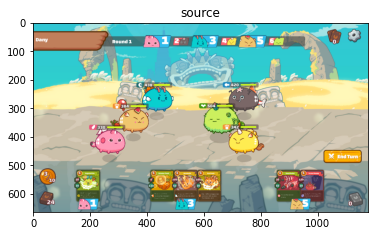

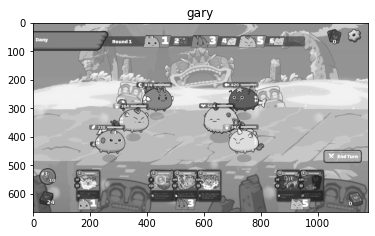

In [16]:
img_battle = cv2.cvtColor(cv2.imread("axie_some/images/20211025-160926.png"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_battle, cv2.COLOR_RGB2GRAY)

show("source", img_battle)
show("gary", gray)

当前框选区域为: 
(201, 212, 288, 247)


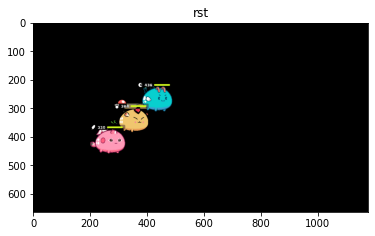

In [35]:
img_show_rect = copy.deepcopy(img_battle)
exit_key = ord('q')

rect = cv2.selectROI("input", img_show_rect, False)
mask = np.zeros(img_battle.shape[:2], np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


print(f"当前框选区域为: \n{rect}")
cv2.destroyAllWindows()

# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img_battle, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img_battle*mask2[:,:,np.newaxis]

show("rst", img)

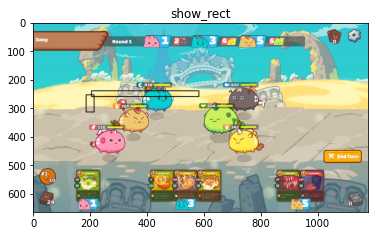

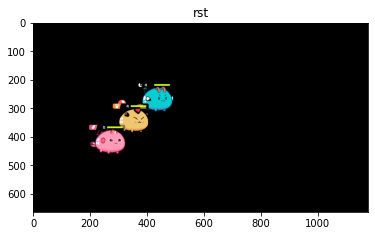

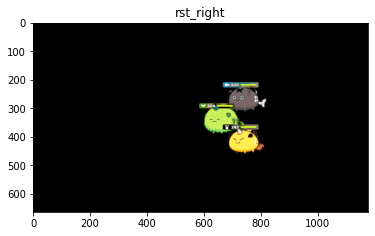

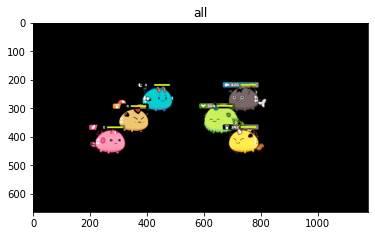

In [36]:
import copy

img_battle_right = copy.deepcopy(img_battle)

mask = np.zeros(img_battle.shape[:2], np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect_left = (186, 214, 314, 254)
rect_right = (582, 205, 240, 260)

cv2.rectangle(img_show_rect, (rect_left[0], rect_left[-1]), (rect_left[1], rect_left[-2]), 0, 2)
# show("show_rect", img_show_rect)
cv2.rectangle(img_show_rect, (rect_right[0], rect_right[-1]), (rect_right[1], rect_right[-2]), 0, 2)
show("show_rect", img_show_rect)

# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img_battle, mask, rect_left, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img_battle*mask2[:,:,np.newaxis]


# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img_battle_right, mask, rect_right, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_right = img_battle_right*mask2[:,:,np.newaxis]

show("rst", img)
show("rst_right", img_right)



cv2.imshow("g_left", img)
cv2.waitKey(0)
cv2.imshow("go", img_right)
cv2.waitKey(0)

img = img + img_right
show("all", img)
cv2.imshow("all", img)
cv2.waitKey(0)
cv2.destroyAllWindows()